## Laboratorio No. 1 -- Operadores
- Diego Cordova 20212
- Paola De León 20361
- Gabriela Contreras 20213

### Ejercicio No.1 

a.1 Leer la secci´on 9.4 sobre el operador Hit or Miss. Explicar con sus propias palabras cómo funciona este operador

  Este operador realiza una erosión de la imágen original utilizando como objeto estructurante la foma que se quiere localizar. Esto deja un pixel en el "centro" de las imágenes detectadas y reduce el área de las imágenes que podrían contener al objeto estructurante. Para eliminar estas, se realiza una inversión de la imágen y se realiza otro opening con el opuesto del objeto estructurante con pixeles del fondo en su alrededor. Por último, la intersección de estos 2 procesos da como resultado una imágen dónde hay "pixeles" localizados en los centros del objeto estrucutrante que se buscó.

a.2 Explicar cómo se construye la operación A ∗ B a partir de las operaciones básicas de dilatación, erosión, opening, closing y diferencia.

  Como primer punto se tiene un opening que está definido por:
  
  $(A \ominus B) \oplus B = A \circ B$
  
  esta es la primera operación del hit or miss.
  Luego se realiza una dilatación de esta operación, seguida de una erosión (closing).

  $[(A \ominus B) \oplus B ] \ominus B = (A \circ B) \bullet B$

  $A * B = \{z | (B)_z \subseteq I\}$

b. Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la
localización de un (o varios) objetos específicos dentro de una imagen binaria I.

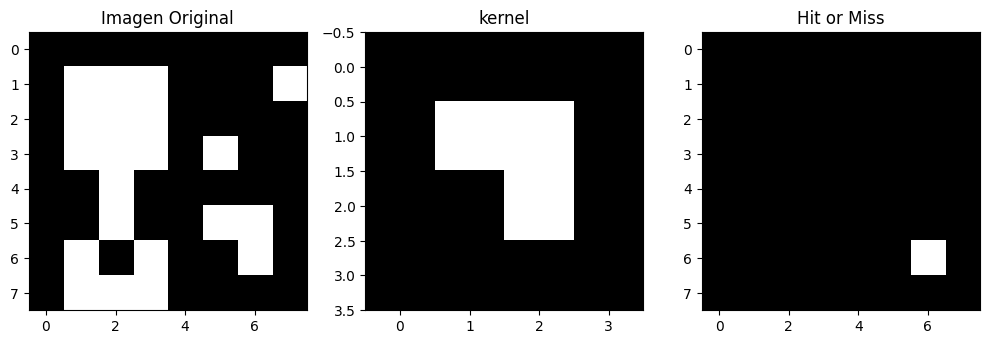

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]
), dtype="uint8")

kernel = np.array((
    [-1, -1, -1, -1],
    [-1, 1, 1, -1],
    [-1, -1, 1, -1],
    [-1, -1, -1, -1]
), dtype="int")

output_image = cv2.morphologyEx(imagen, cv2.MORPH_HITMISS, kernel)

# Mostrar Resultado
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('kernel')

axs[2].imshow(output_image, cmap='gray')
axs[2].set_title('Hit or Miss')

plt.tight_layout()
plt.show()


Como se puede ver en la imágen, Se detecta el objeto estructurante y se marca la ubicación del mismo con un pixel *blacno*

### Ejercicio No.2
nvertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas
para remover y restaurar la imagen.

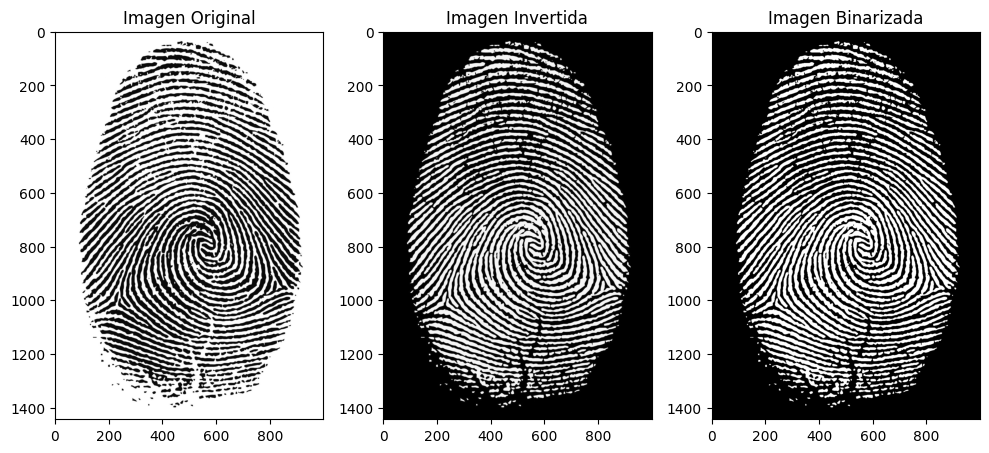

In [2]:
# Cargar la imagen
imagen = cv2.imread('./images/fingerprint.jpeg', cv2.IMREAD_GRAYSCALE)
imagen_invertida = cv2.bitwise_not(imagen)
_, imagen_binarizada = cv2.threshold(imagen_invertida, 127, 255, cv2.THRESH_BINARY)

# Print de imagenes
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(imagen_invertida, cmap='gray')
axs[1].set_title('Imagen Invertida')

axs[2].imshow(imagen_binarizada, cmap='gray')
axs[2].set_title('Imagen Binarizada')

plt.tight_layout()
plt.show()



**Remover Imagen**

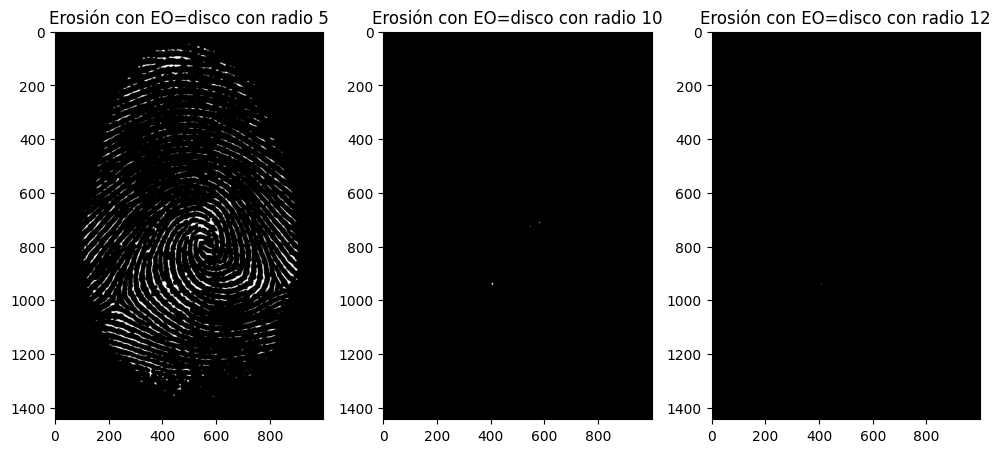

In [3]:
from skimage import morphology as mo

# Leer la imagen
I = imagen_binarizada

# Crear objeto estructurante como disco
s5 = mo.disk(5)
s10 = mo.disk(10)
s12 = mo.disk(12)

# ---- Erosiones ----
erosion5 = mo.erosion(I, s5)
erosion10 = mo.erosion(I, s10)
erosion12 = mo.erosion(I, s12)

# Print de imagenes
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(erosion5, cmap='gray')
axs[0].set_title('Erosión con EO=disco con radio 5')

axs[1].imshow(erosion10, cmap='gray')
axs[1].set_title('Erosión con EO=disco con radio 10')

axs[2].imshow(erosion12, cmap='gray')
axs[2].set_title('Erosión con EO=disco con radio 12')

plt.tight_layout()
plt.show()


Como se puede ver, al realizar una erosión, hay fragmentos de la imágen que desaparecen. Además, al utilizar un objeto estructurante de disco con radio 15, la imágen es removida por completo.

**Restaurar Imagen**

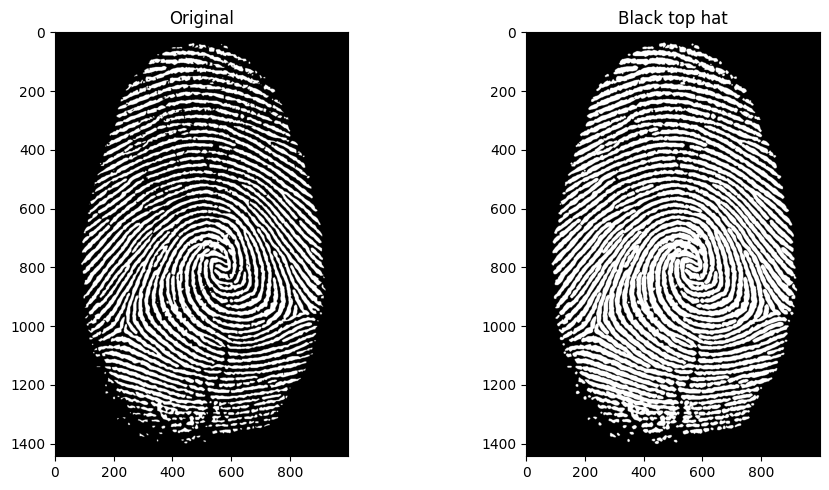

In [4]:
# Leer la imagen
I = imagen_binarizada
s5 = mo.disk(2)

# ---- Erosiones ----
opening = mo.opening(I, s5)
opening = mo.dilation(I, s5)

# Print de imagenes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(I, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(opening, cmap='gray')
axs[1].set_title('Black top hat')

plt.tight_layout()
plt.show()


### Ejercicio No.3

In [5]:
import skimage
import numpy as np 
from skimage import io, morphology, color
import matplotlib.pyplot as plt

# Lectura y procesamiento
img_quetzal = io.imread("img_ej3/quetzalgris.png")
img_4canales = img_quetzal[:, :, :3]  # Elimino 4to canal 
img1 = color.rgb2gray(img_4canales)

# Lectura 
img_rayosX = io.imread("img_ej3/chestxray.jpeg")
img2 = color.rgb2gray(img_rayosX)

# Lectura y conversion a escala de grises
img_mariposa = io.imread('img_ej3/butterfly.jpeg')
img3 = color.rgb2gray(img_mariposa)


In [6]:
def filters (img1, img2, img3, selem):
    # EROSION 
    erosion_im1 = morphology.erosion(img1, selem)
    erosion_im2 = morphology.erosion(img2, selem)
    erosion_im3 = morphology.erosion(img3, selem)

    # DILATACIÓN
    dilation_im1 = morphology.dilation(img1, selem)
    dilation_im2 = morphology.dilation(img2, selem)
    dilation_im3 = morphology.dilation(img3, selem)

    # OPENING
    opening_im1 = morphology.opening(img1, selem)
    opening_im2 = morphology.opening(img2, selem)
    opening_im3 = morphology.opening(img3, selem)

    # CLOSING
    closing_im1 = morphology.closing(img1, selem)
    closing_im2 = morphology.closing(img2, selem)
    closing_im3 = morphology.closing(img3, selem)

    # WHITE TOP HAT
    WTH_img1 = morphology.white_tophat(img1, selem)
    WTH_img2 = morphology.white_tophat(img2, selem)
    WTH_img3 = morphology.white_tophat(img3, selem)

    return erosion_im1, erosion_im2, erosion_im3, dilation_im1, dilation_im2, dilation_im3, opening_im1, opening_im2, opening_im3, closing_im1, closing_im2, closing_im3, WTH_img1, WTH_img2, WTH_img3


In [7]:
def showPlot(n, original, dilatacion, erocion, abierto, cerrado, s, s1, s2, s3, s4, WTH=None, s5=None,):
    fig, axs = plt.subplots(1, n, figsize=(14, 6))
    arr_img = [img for img in [original, dilatacion, erocion, abierto, cerrado, WTH] if img is not None] 
    arr_shape = [shape for shape in[s, s1, s2, s3, s4, s5]if shape is not None] 

    for i in range(n):
        img = arr_img[i]
        shape = arr_shape[i]
        title = "IMG " + shape
        axs[i].axis('off')
        axs[i].set_title(title)
        axs[i].imshow(img, cmap='gray')

--- Resultados utilizando operacion morfologica de circulo ---


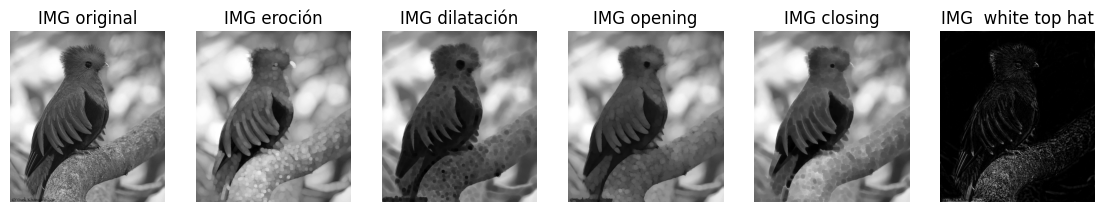

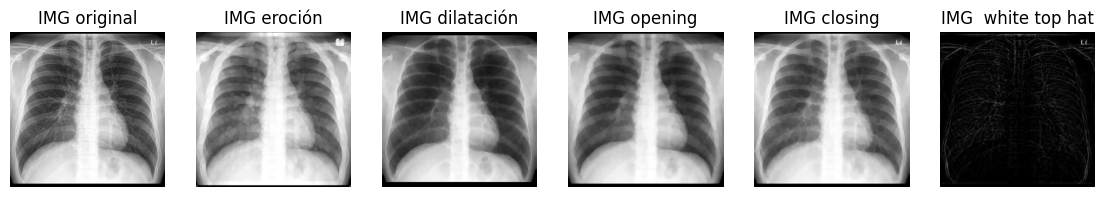

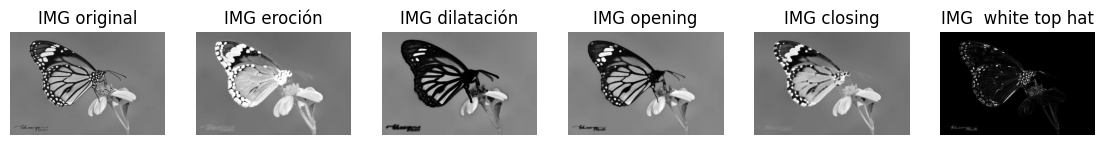

In [8]:
# OPERACION MORFOFLOGICA DE CIRCULO 
selem = skimage.morphology.disk(5)

# APLICAR DIFERENTES FILTROS A OPERACION 
I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13, I14, I15 = filters(img1, img2, img3, selem)

# MOSTRAR IMAGENES CON PRIMERA OPERACION MORFOLOGICA 
print("--- Resultados utilizando operacion morfologica de circulo ---")
showPlot(6, img1, I4, I1, I7, I10, 'original',  'eroción', 'dilatación', 'opening', 'closing', I13, ' white top hat')
showPlot(6, img2, I5, I2, I8, I11,  'original', 'eroción', 'dilatación', 'opening', 'closing', I14,' white top hat')
showPlot(6, img3, I6, I3, I9, I12,  'original', 'eroción', 'dilatación', 'opening', 'closing', I15,' white top hat')

--- Resultados utilizando operacion morfologica de diamante ---


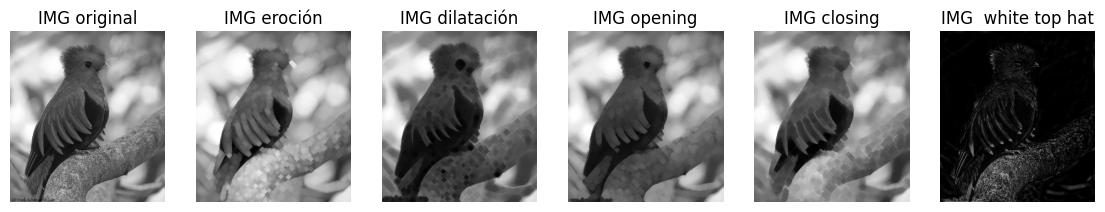

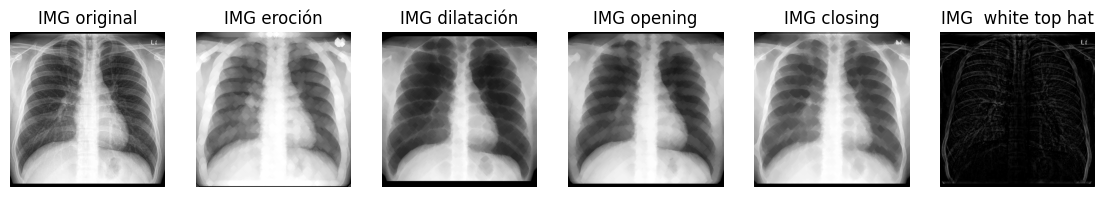

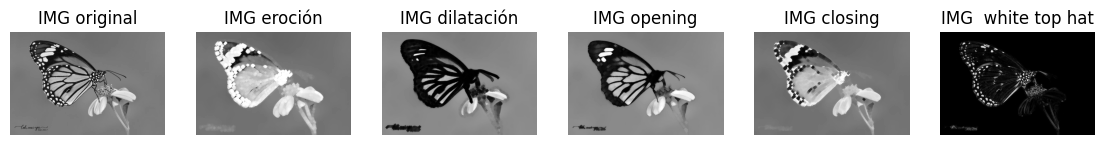

In [9]:
# OPERACION MORFOFLOGICA DE DIAMANTE 
selem2 = skimage.morphology.diamond(8)

# APLICAR DIFERENTES FILTROS A OPERACION 
I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13, I14, I15 = filters(img1, img2, img3, selem2)

# MOSTRAR IMAGENES CON SEGUNDA OPERACION MORFOLOGICA 
print("--- Resultados utilizando operacion morfologica de diamante ---")
showPlot(6, img1, I4, I1, I7, I10, 'original',  'eroción', 'dilatación', 'opening', 'closing', I13, ' white top hat')
showPlot(6, img2, I5, I2, I8, I11,  'original', 'eroción', 'dilatación', 'opening', 'closing', I14,' white top hat')
showPlot(6, img3, I6, I3, I9, I12,  'original', 'eroción', 'dilatación', 'opening', 'closing', I15,' white top hat')

--- Resultados utilizando operacion morfologica de cuadrado ---


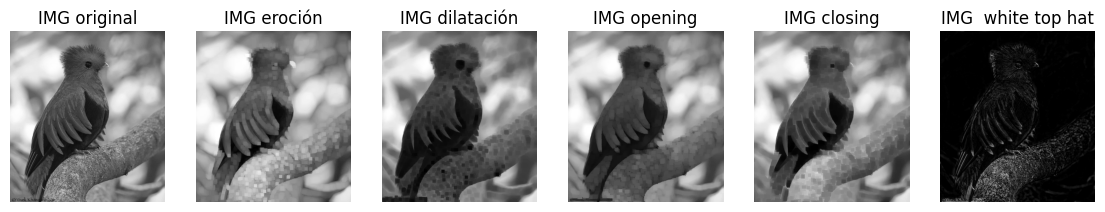

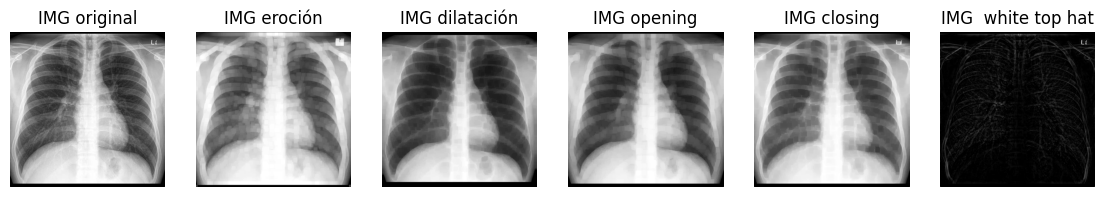

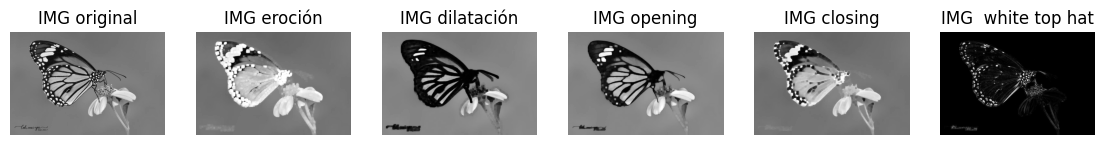

In [10]:
# OPERACION MORFOFLOGICA DE CUADRADO 
selem3 = skimage.morphology.square(10)

# APLICAR DIFERENTES FILTROS A OPERACION 
I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13, I14, I15 = filters(img1, img2, img3, selem3)

# MOSTRAR IMAGENES CON TERCERA OPERACION MORFOLOGICA 
print("--- Resultados utilizando operacion morfologica de cuadrado ---")
showPlot(6, img1, I4, I1, I7, I10, 'original',  'eroción', 'dilatación', 'opening', 'closing', I13, ' white top hat')
showPlot(6, img2, I5, I2, I8, I11,  'original', 'eroción', 'dilatación', 'opening', 'closing', I14,' white top hat')
showPlot(6, img3, I6, I3, I9, I12,  'original', 'eroción', 'dilatación', 'opening', 'closing', I15,' white top hat')

--- Resultados utilizando operacion morfologica de rectangulo ---


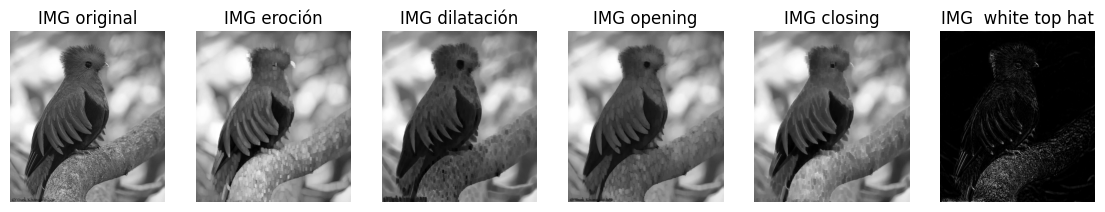

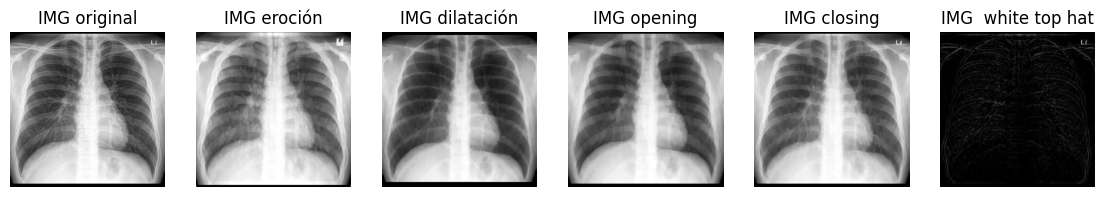

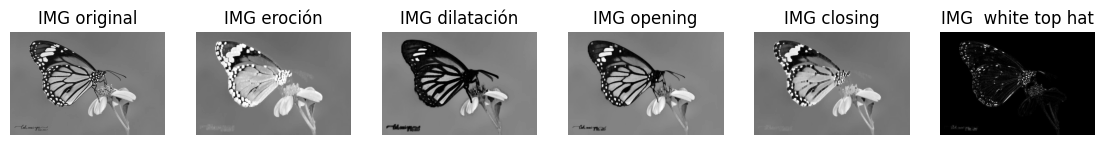

In [11]:
# OPERACION MORFOFLOGICA DE RECTANGULO 
selem4 = skimage.morphology.rectangle(10,5)

# APLICAR DIFERENTES FILTROS A OPERACION 
I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13, I14, I15 = filters(img1, img2, img3, selem4)

# MOSTRAR IMAGENES CON CUARTA OPERACION MORFOLOGICA 
print("--- Resultados utilizando operacion morfologica de rectangulo ---")
showPlot(6, img1, I4, I1, I7, I10, 'original',  'eroción', 'dilatación', 'opening', 'closing', I13, ' white top hat')
showPlot(6, img2, I5, I2, I8, I11,  'original', 'eroción', 'dilatación', 'opening', 'closing', I14,' white top hat')
showPlot(6, img3, I6, I3, I9, I12,  'original', 'eroción', 'dilatación', 'opening', 'closing', I15,' white top hat')

- **¿Cúal es el efecto de aplicar dilatación y erosión a estas imágenes?**
    - Como se puede observar en las imagenes la erosión hace que estas se vean más claras a comparación del resto, por lo que se puede apreciar que en algunos puntos se pierden cietos detalles puesto a que el elemento estructural se vuelven más delgados. 
    
    
        Por otro lado al ver la dilatación, se puede apreciar lo contrario a la erosión ya que se puede ver que algunos detalles de las imagenes se han engrosado y por ende son más visibles ante el ojo humano. Esto se debe a que el elemento estructural ha aumentado su grosor


- **¿Cúal es el efecto de aplicar opening y closing a estas imágenes?**
    - Como se puede observar en las imagenes el opening preserva la forma original de las imagnes y en algunos casos hace  que los bordes externos sean mas suaves lo cual mejora la imagen. Es importante destacar que dependiendo del elemento estructural que se este utilizando van a haber areas donde se logran mantener algunos detalles y en otras no debdio a la erosión. 

        Por otra parte con el closing se puede ver hay algunos detalles externos se pierden no obstante los bordes internos se ve una mejora pues le da un mejor realce a la figura principal de la imagen. Cabe destacaer, que dependiendo del elemento estructural con el que se este trabajando este se puede hacer que el realce que se menciono con anterioridad sea menor. 

    
- **¿Qué hace el white top-hat? ¿Para qué puede ser útil?**
    - Es un tipo de operador morfológico que es mayormente utilizado en la detección de características en imágenes digitales. Este operador resalta las regiones claras más pequeñas que sus alrededores en la imagen, útil para detectar detalles finos y objetos pequeños.    

### Ejercicio No.4

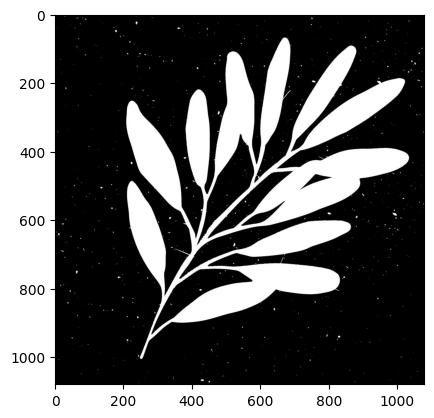

In [12]:
# Lectura de imagen
img_hoja = io.imread("img_ej3/hojaRuido.jpg")
img4 = color.rgb2gray(img_hoja)


plt.imshow(img_hoja)

In [13]:
#  (A ◌ B) ● B
def Secuential_filter (img, selem):
    # OPENING (A ◌ B)
    opening_img= morphology.opening(img, selem)
    # CLOSING ● B
    closing_im1 = morphology.closing(opening_img, selem)

    return closing_im1


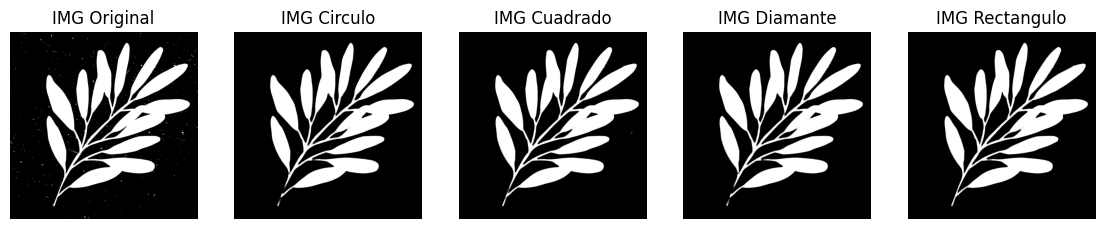

In [14]:
# OPERACION MORFOFLOGICA DE CIRCULO 
selem = skimage.morphology.disk(4)

# OPERACION MORFOFLOGICA DE CUADRADO 
selem2 = skimage.morphology.square(6)

# OPERACION MORFOFLOGICA DE DIAMANTE 
selem3 = skimage.morphology.diamond(4)

# OPERACION MORFOFLOGICA DE RECTANGULO 
selem4 = skimage.morphology.rectangle(8,4)

result_circle = Secuential_filter(img4,selem)
result_square = Secuential_filter(img4,selem2)
result_diamond = Secuential_filter(img4,selem3)
result_rectangle = Secuential_filter(img4,selem4)

showPlot(5, img4, result_circle, result_square,result_diamond,result_rectangle,"Original", "Circulo", "Cuadrado", "Diamante", "Rectangulo")


**Comparar los resultados obtenidos e indicar cúal es el efecto resultante**
- Al ver todos los resultados con diferentes elementos estructurales se puede apreciar que dependiendo de la configuración que se le de a cada uno se puede esperar un mejor resultado. Como se puede ver en este caso el elemento del rectangulo fue el que mejor logro eliminar dicho ruido y al mismo tiempo presevar la imagen principal; por otro lado los otros elementos lograron eliminar también el ruido pero hay partes en donde se pierden algunos pixeles del tallo. 

### Ejercicio No.5

### Ejercicio No.6

### Ejercicio No.7

### Ejercicio No.8
**a)**

In [28]:
def showTransformation(og, ed, result, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(10, 5))

  axs[0].imshow(og, cmap='gray')
  axs[0].set_title('Imagen Original')

  axs[1].imshow(ed, cmap='gray')
  axs[1].set_title('Objeto estructurante')

  axs[2].imshow(result, cmap='gray')
  axs[2].set_title(f'Resultado de {titulo}')

  plt.tight_layout()
  plt.show()


**d)** Se realizo un opening seguido de un closing con un

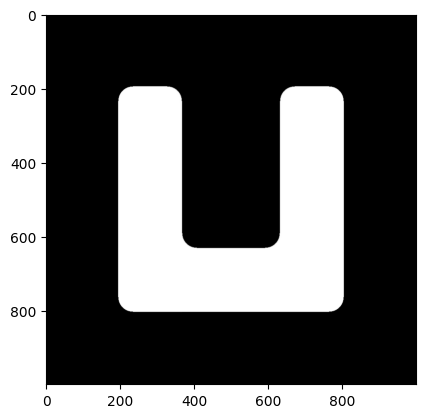

TypeError: showTransformation() takes 3 positional arguments but 4 were given

In [29]:
I = cv2.imread('./images/ej8.jpg', cv2.IMREAD_GRAYSCALE)

se = mo.disk(40) # el radio es 100
d = mo.opening(I, se)
d = mo.closing(d, se)

plt.imshow(d , cmap='gray')
plt.show()

showTransformation(I, se, d, 'Opening y closing')